In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from reader import read_data
from feature_engineering import clean_dataset

In [ ]:
import shap
shap.initjs()

In [14]:
# Dataset for correlation study
def dataset_for_correlation():
    default_risk_dataset = read_data(default_year=1)
    cleaned_default_risk = clean_dataset(
        default_risk_dataset,
        ratio_na_per_features=0.05,
        nb_na_sample_threshold=0,
        ratio_under_oversampled=0.2
    )
    return cleaned_default_risk

df_corr = dataset_for_correlation()

<Axes: >

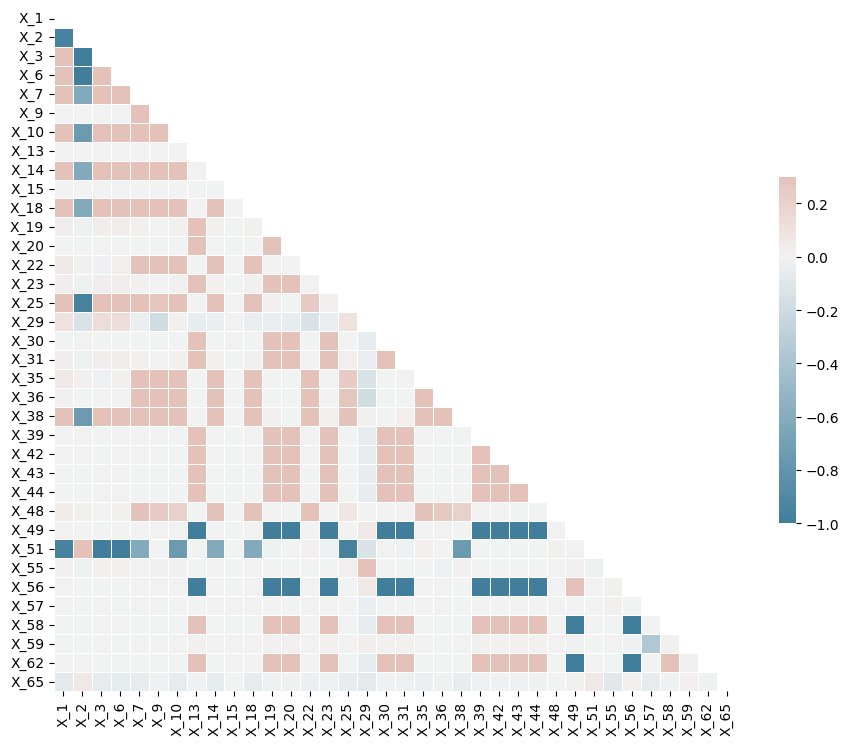

In [18]:
# Correlation study
data_corr = df_corr.corr()
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(data_corr, dtype=bool))
colormap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data_corr, 
            mask=mask, 
            cmap=colormap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

In [23]:
##################
# MACHINE LEARNING
##################

# grid parameters for optimization
tree_param = dict(max_depth=[6, 8, 10, 12],
                  criterion=['gini', 'entropy']
                  )

tree_opt = GridSearchCV(
    tree.DecisionTreeClassifier(random_state=42),
    param_grid=tree_param
)

# results of best params
tree_opt.fit(X_train, y_train)
print('Best Criterion:', tree_opt.best_estimator_.get_params()['criterion'])
print('Best max_depth:', tree_opt.best_estimator_.get_params()['max_depth'])

Best model is Tree Decision Classifier with f1_score: 0.43
Best model is Tree Decision Classifier with acc_score: 0.77
Best Criterion: entropy
Best max_depth: 10


In [6]:
######
# SHAP
######
shap_mod = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
shap_mod.fit(X_train, y_train)
explainer = shap.Explainer(shap_mod, X_train)
shap_values = explainer(X_train)

shap.plots.waterfall(shap_values[0])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).